### Reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file='data/sonar_data.csv'
# csv_file='data/sonar_data_standing.csv'
col_names = ["time", "seq", "stamp", "frame_id", "s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9"]
df = pd.read_csv(csv_file, names=col_names, header=0, usecols=range(4, 14))
df = df.applymap(lambda x: np.nan if x == -1 else x) # Set -1 to NaN
df

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,696,716,1800,924.0,NaN,820.0,737.0,727,818.0,664.0
1,699,760,1509,1015.0,NaN,2558.0,727.0,736,1700.0,673.0
2,710,739,1819,3300.0,NaN,2558.0,726.0,760,1696.0,699.0
3,710,771,1150,2806.0,4032.0,2568.0,726.0,742,1706.0,699.0
4,710,832,1778,985.0,2249.0,2577.0,726.0,735,1690.0,690.0
...,...,...,...,...,...,...,...,...,...,...
5585,699,760,1356,913.0,NaN,2568.0,726.0,736,1680.0,673.0
5586,699,801,1808,912.0,1244.0,2556.0,726.0,751,1695.0,688.0
5587,699,739,1355,912.0,1662.0,2567.0,737.0,755,1679.0,700.0
5588,699,842,1345,922.0,1641.0,2092.0,735.0,766,1679.0,679.0


In [3]:
df.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9
count,5590.000000,5590.000000,5590.000000,4953.000000,5236.000000,5153.000000,5397.000000,5590.000000,5589.000000,5587.000000
mean,706.796064,708.298390,938.667442,1413.914597,1479.213522,1680.965457,1083.120067,738.570304,1040.201109,589.311437
std,311.776760,373.541079,533.153913,1107.647391,1086.869881,1215.457276,808.683606,251.649452,641.264016,222.401809
min,26.000000,39.000000,80.000000,58.000000,48.000000,28.000000,47.000000,98.000000,26.000000,24.000000
25%,524.000000,432.000000,552.000000,676.000000,654.000000,706.000000,644.000000,616.250000,574.000000,481.000000
50%,751.000000,740.000000,894.000000,1046.000000,1313.500000,1486.000000,849.000000,760.000000,883.000000,669.000000
75%,946.000000,915.000000,1243.000000,1715.000000,2066.000000,2186.000000,1413.000000,924.000000,1544.000000,758.000000
max,1632.000000,2498.000000,3917.000000,6830.000000,6673.000000,6695.000000,6823.000000,1470.000000,4673.000000,926.000000


In [4]:
df["s0"]

0       696
1       699
2       710
3       710
4       710
       ... 
5585    699
5586    699
5587    699
5588    699
5589    710
Name: s0, Length: 5590, dtype: int64

### Some other calculation not necessary

In [5]:
# dfm = pd.DataFrame()  # Max delta values
# SONAR_COUNT = 10
# for i in range(SONAR_COUNT):
#     dfm.loc[0, f"maxdy{i}"] = max(dy)
# dfm

### Filtering data

In [6]:
# %matplotlib notebook
%matplotlib inline


dfd = pd.DataFrame()  # Delta data
dff = pd.DataFrame()  # Filtered data
dfff = pd.DataFrame()  # Filtered filtered data

RANGE_THRESH = 10
SONAR_COUNT = 10
for i in range(SONAR_COUNT):
    sname = f"s{i}"
    sonar = df[sname]
    
    y=list(sonar)

    dy = [y[n]-y[n-1] for n in range(len(y))]
    yf = [j if dj < RANGE_THRESH  else float('nan') for j, dj in zip(y, dy)]
#     yf = [dj * 0.1 + j*0.9 if dj < RANGE_THRESH  else float('nan') for j, dj in zip(y, dy)]

    yff = [0.5 * yf[n] + 0.5 * yf[n-1] for n in range(len(yf))]
    
    dfd.loc[:, sname] = dy
    dff.loc[:, sname] = yf
    dfff.loc[:, sname] = yff

print(dff)
print(dfff)
#     sy = list(df[sname].rolling(window=2).mean())
#     dsy = [sy[n]-sy[n-1] for n in range(len(sy))]
    
    
#     if True:
#         a = 0
#         b = min(a + 200, df.s0.count())
#         x = x[a:b]
#         y = y[a:b]
#         dy = dy[a:b]
#         sy = sy[a:b]
#         dsy = dsy[a:b]

#         y = [j if dj < 3  else float('nan') for j, dj in zip(y, dy)]

         s0     s1      s2      s3      s4      s5     s6     s7      s8  \
0     696.0  716.0     NaN   924.0     NaN   820.0  737.0  727.0   818.0   
1     699.0    NaN  1509.0     NaN     NaN     NaN  727.0  736.0     NaN   
2       NaN  739.0     NaN     NaN     NaN  2558.0  726.0    NaN  1696.0   
3     710.0    NaN  1150.0  2806.0     NaN     NaN  726.0  742.0     NaN   
4     710.0    NaN     NaN   985.0  2249.0  2577.0  726.0  735.0  1690.0   
...     ...    ...     ...     ...     ...     ...    ...    ...     ...   
5585  699.0  760.0  1356.0   913.0     NaN  2568.0  726.0  736.0  1680.0   
5586  699.0    NaN     NaN   912.0     NaN  2556.0  726.0    NaN     NaN   
5587  699.0  739.0  1355.0   912.0     NaN     NaN    NaN  755.0  1679.0   
5588  699.0    NaN  1345.0     NaN  1641.0  2092.0  735.0    NaN  1679.0   
5589    NaN  729.0     NaN     NaN     NaN     NaN  740.0  741.0     NaN   

         s9  
0     664.0  
1     673.0  
2       NaN  
3     699.0  
4     690.0  
...

### Plotting data

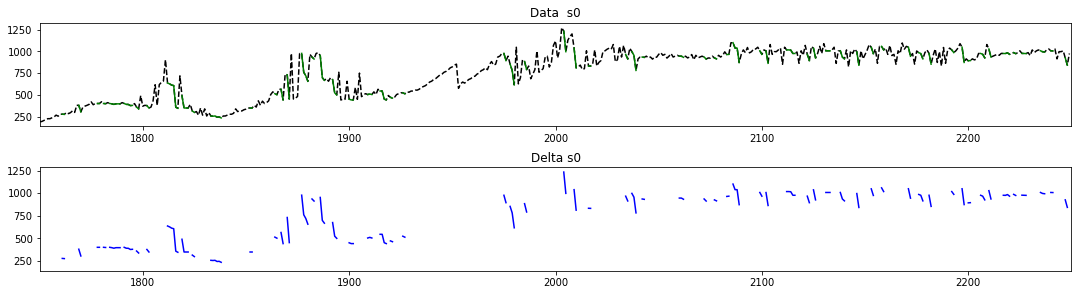

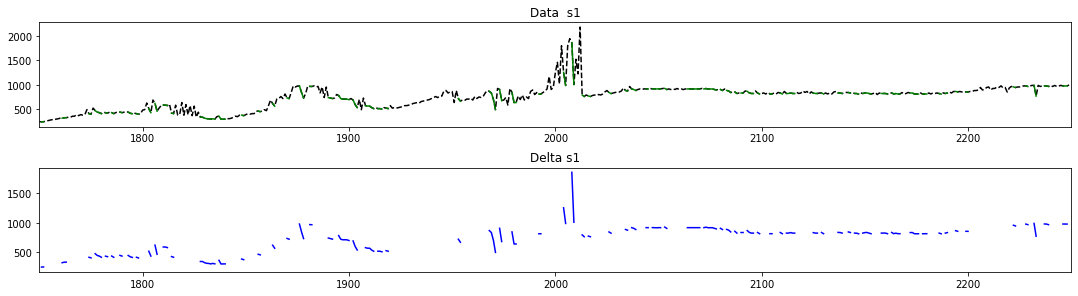

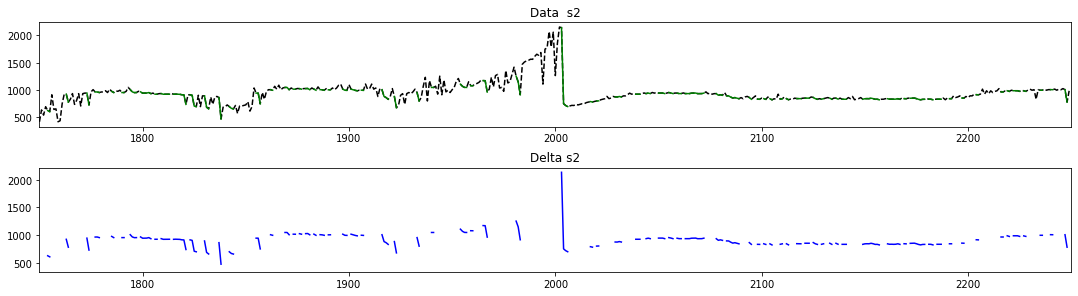

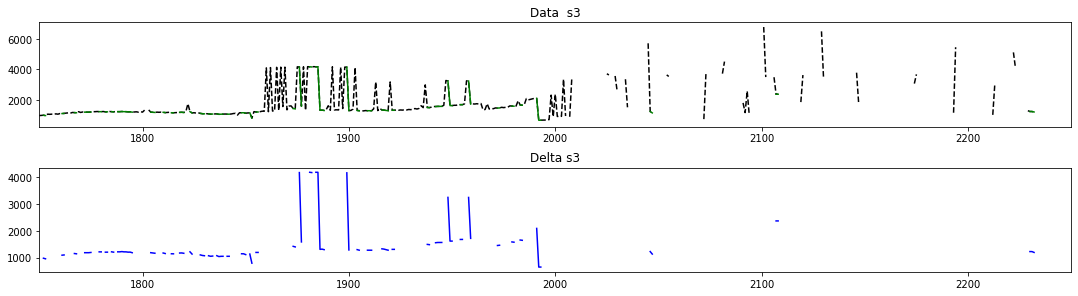

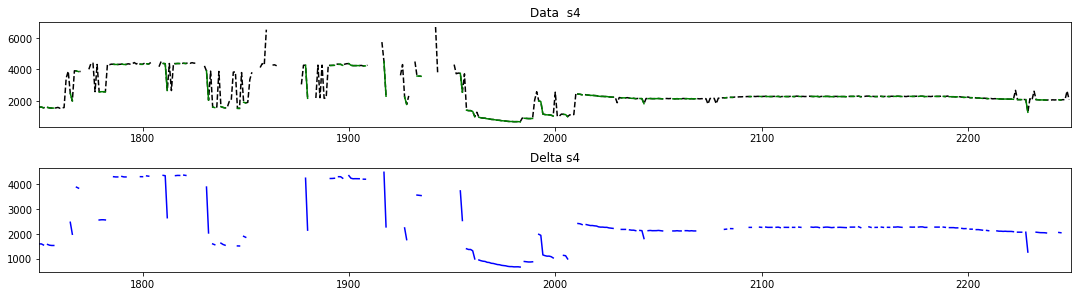

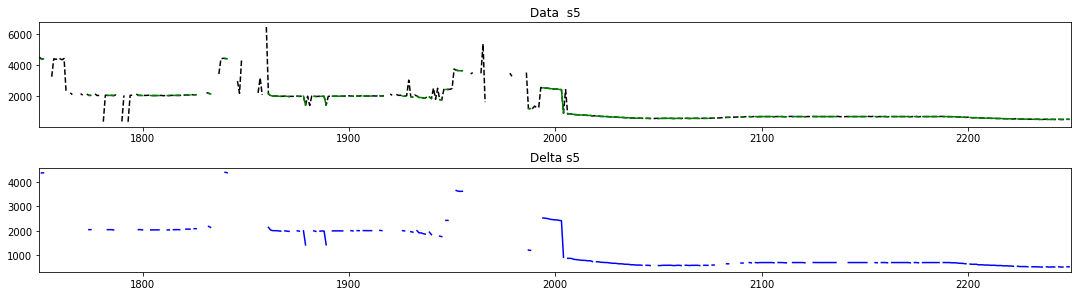

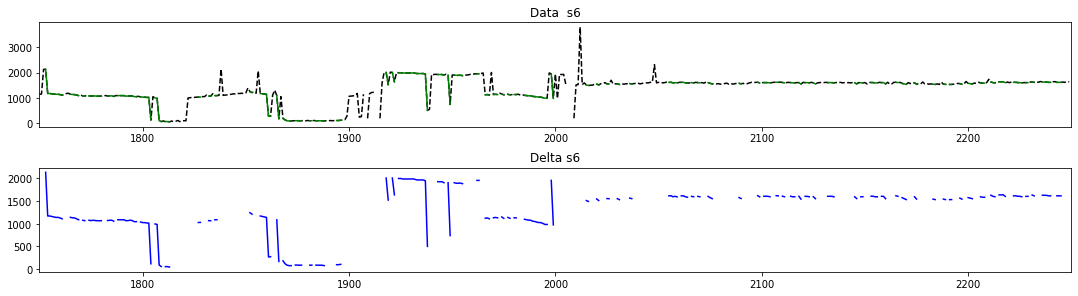

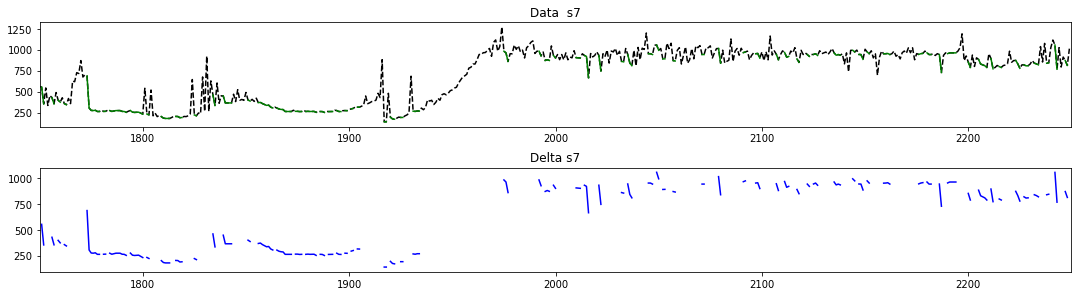

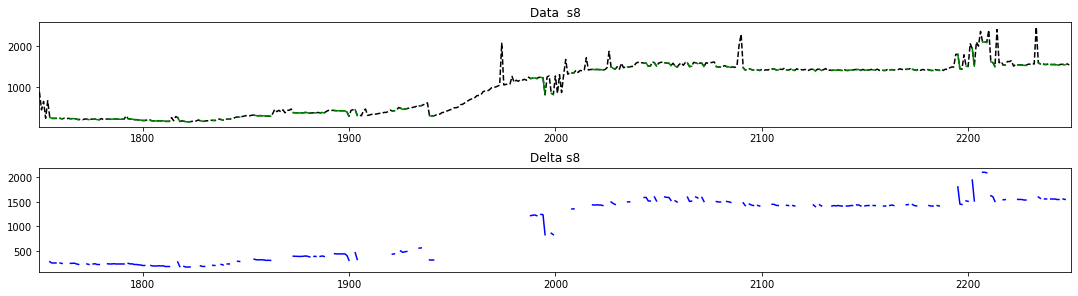

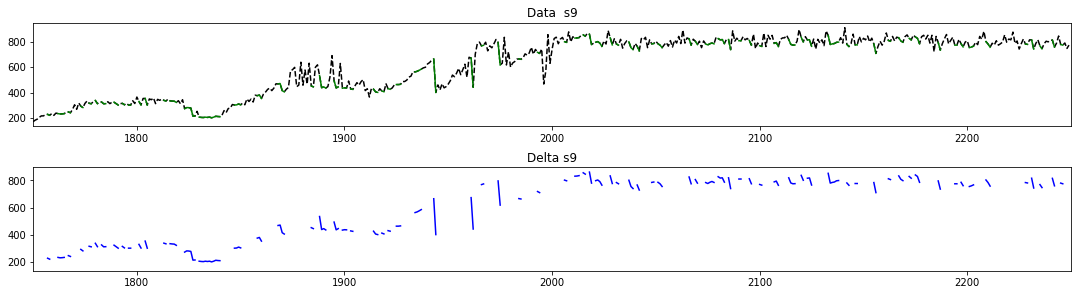

""


In [9]:
# %matplotlib notebook
%matplotlib inline

dfm = pd.DataFrame()

SONAR_COUNT = 10
for i in range(SONAR_COUNT):
    sname = f"s{i}"
    sonar = df[sname]
#     x=range(len(sonar))
#     y=list(sonar)

#     dy = [y[n]-y[n-1] for n in range(len(y))]
#     sy = list(df[sname].rolling(window=2).mean())
#     sy = y
#     dsy = [sy[n]-sy[n-1] for n in range(len(sy))]
    
    if True:
        a = 1750
        b = min(a + 500, df.s0.count())
        
#         y[50:100] = [np.nan, ] * 50
#         y = np.array(y)
#         dy = np.array(dy)
#         y[dy > 7] = np.nan
#         y = [j if dj < 3  else float('nan') for j, dj in zip(y, dy)]
    
        plt.figure(figsize=(15, 40))

        plt.subplot(SONAR_COUNT * 2, 1, 2 * i + 1)
        plt.title(f"Data  {sname}")
        plt.xlim(a, b)
#         plt.plot(dfff.index[a:b], dfff[sname][a:b], "b")
        plt.plot(df.index[a:b], df[sname][a:b], "k--")
        plt.plot(dff.index[a:b], dff[sname][a:b], "g")
#         plt.scatter(df.index[a:b], df[sname][a:b])
#         plt.scatter(dff.index[a:b], dff[sname][a:b], color="g")

        plt.subplot(SONAR_COUNT * 2, 1, 2 * i + 2)
        plt.title(f"Delta {sname}")
        plt.xlim(a, b)
#         plt.plot(dfd.index[a:b], dfd[sname][a:b])
        plt.plot(dff.index[a:b], dff[sname][a:b], color="b")

        plt.tight_layout(pad=0.8)
        plt.show()
#     a = input()
dfm